In [1]:
import pandas as pd
import numpy as np 
import itertools
import nltk


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [16]:
reviews = pd.read_csv('test_data/test_strains_reviews.csv')

In [34]:
r = reviews.set_index('Unnamed: 0')
r
r.T

Unnamed: 0,-Jimbo--,0lexis,1012crew,1033InProgress,11scorpio11,12345goog,123Buddy,188beats,1kushking,1ofthisother,...,yotreenbeard,youngguns7362,yumi.77,zNick,zacharyd3,zephtiva,zerocool1903,zestyalaister,zewhat,zsteryman
hybrid/blue-dream,NaN,NaN,"""Purchased at the SQDC in Quebec. Blue Dream b...",NaN,"""I have Ehlers Danlos Syndrome and am constant...",NaN,"""Tried this for the first time today. Took two...",NaN,NaN,"""Dream is right! Try smoking before bed and yo...",...,"""always a great to smoke for a sesh """,NaN,NaN,NaN,NaN,NaN,NaN,"""I'm a new smoker. Trying Blue Dream made me f...",NaN,NaN
sativa/sour-diesel,NaN,NaN,NaN,"""Not the best looking buds in my opinion, but ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"""small amounts- i get happy, energy, euphori...",NaN,"""A strain that definitely lives up to the hype...","""Good for a slight day time high, you can stil...",NaN,NaN,NaN,"""Sour Diesel is one of the few sativa-dom stra...",NaN
hybrid/gsc,NaN,NaN,NaN,NaN,NaN,"""Made me very paranoid, felt like I was dying.""",NaN,NaN,"""GSC (AKA:Girl Scout Cookies & Cookies) has so...","""Best consumed in 1G joint form with favorite ...",...,NaN,NaN,NaN,NaN,NaN,NaN,"""lorem ipsum""",NaN,NaN,NaN
sativa/green-crack,"""This one was a little intense for me as i nor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hybrid/og-kush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"""OG Kush is my favorite. A perfect happy high...",NaN,NaN,NaN,NaN
indica/granddaddy-purple,NaN,"""I am a very new cannabis user, having only be...",NaN,NaN,NaN,NaN,NaN,"""This is one of these best strains I've tried!...",NaN,NaN,...,NaN,NaN,"""This strain does the job. It is excellent for...",NaN,NaN,NaN,"""dvefbd""",NaN,NaN,"""I just have to start by saying When it comes ..."


## Create some lists of reviews

In [3]:
blu_dream = reviews['hybrid/blue-dream'].dropna().tolist()

In [37]:
sour_d =  reviews['sativa/sour-diesel'].dropna().tolist()
sour_d

['"Not the best looking buds in my opinion, but I\'m in love with dense buds like PE. \n\nStrong smell that is very difficult to mask. This strain is a staple in a smokers bucket list. Definitely something to try atleast once. It\'s fairly strong and has it\'s uniqe attributes, but still just an average topshelf smoke. "',
 '"Ohhhhhh Sour Diesel my friend! Oooooo boy am I enjoying this one. 1 big hit on my pipe and I am away my friends. Damn!\nSo for me this is how it is: It took a few minutes after taking a hit before I felt the effects. But when I did I can tell you I am liking it very much.\n\nI would say right now I’m more uplifted and a lot happier. Happier that’s  above happiness but not close to ecstatic. The happiness that makes you ..."',
 '"This shit is fucking amazing for stress and motivation, I ended up writing a short book, god knows why."',
 '"4 stars plus... Good for my ADHD, especially after the short euphoria wears off. Musical and upbeat. Moderate paranoia that can b

In [5]:
gsc =reviews['hybrid/gsc'].dropna().tolist()
green_crack = reviews['sativa/green-crack'].dropna().tolist()
ogk = reviews['hybrid/og-kush'].dropna().tolist()
gdp = reviews['indica/granddaddy-purple'].dropna().tolist()

In [6]:
all_strains = blu_dream + gsc + green_crack + sour_d + ogk + gdp
len(all_strains)

1865

In [7]:
stopwords_ = "a,able,about,across,after,all,almost,also,am,among,an,and,any,\
are,as,at,be,because,been,but,by,can,could,dear,did,do,does,either,\
else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,\
how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,\
me,might,most,must,my,neither,no,of,off,often,on,only,or,other,our,\
own,rather,said,say,says,she,should,since,so,some,than,that,the,their,\
them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,\
what,when,where,which,while,who,whom,why,will,with,would,yet,you,your]".split(',')

In [8]:
TFID = TfidfVectorizer()

In [14]:
#Vectorize the reviews for all of my strains
def strain_to_vec(s):
    TFID = TfidfVectorizer(stop_words='english', vocabulary=all_bow)
    strain_tf = TFID.fit_transform(s)
    bow = TFID.vocabulary_
    strain_vec = strain_tf.toarray()
    #strain_vec = new.flatten()
    return strain_vec.flatten(), bow

In [15]:
blu_dream_vec, blu_bow = strain_to_vec(blu_dream)
green_crack_vec, green_bow = strain_to_vec(green_crack)
ogk_vec, ogk_bow = strain_to_vec(ogk)
gdp_vec, gdp_bow= strain_to_vec(gdp)
sour_d_vec, sour_d_bow = strain_to_vec(sour_d)
gsc_vec, gsc_bow = strain_to_vec(gsc)

In [13]:
all_strains_vec, all_bow = strain_to_vec(all_strains)
sorted(all_bow.items())

[('00', 0),
 ('000', 1),
 ('01', 2),
 ('08', 3),
 ('10', 4),
 ('100', 5),
 ('10000', 6),
 ('100pct', 7),
 ('10mg', 8),
 ('10pm', 9),
 ('10x', 10),
 ('11', 11),
 ('12', 12),
 ('13', 13),
 ('14', 14),
 ('14grams', 15),
 ('15', 16),
 ('150', 17),
 ('15g', 18),
 ('16', 19),
 ('16th', 20),
 ('17', 21),
 ('1730', 22),
 ('1767', 23),
 ('18', 24),
 ('180', 25),
 ('19', 26),
 ('1900', 27),
 ('1980', 28),
 ('1990', 29),
 ('1g', 30),
 ('1hit', 31),
 ('1lb', 32),
 ('1st', 33),
 ('20', 34),
 ('2000', 35),
 ('200c', 36),
 ('2010', 37),
 ('2012', 38),
 ('2014', 39),
 ('2016', 40),
 ('202', 41),
 ('20min', 42),
 ('22', 43),
 ('220', 44),
 ('225mg', 45),
 ('23', 46),
 ('231', 47),
 ('24', 48),
 ('25', 49),
 ('250mg', 50),
 ('26', 51),
 ('27', 52),
 ('28', 53),
 ('29', 54),
 ('2am', 55),
 ('2grams', 56),
 ('2h', 57),
 ('2nd', 58),
 ('30', 59),
 ('30am', 60),
 ('30pm', 61),
 ('31', 62),
 ('32', 63),
 ('33', 64),
 ('3354', 65),
 ('34', 66),
 ('347', 67),
 ('360', 68),
 ('392', 69),
 ('395', 70),
 ('3rd', 

In [286]:
sour_d_vec.shape

(2993274,)

In [291]:
new_blu = blu_dream_vec.reshape((2617575,1))
new_greencrack = green_crack_vec.reshape((1459683,1))
new_ogk = ogk_vec.reshape((1133256,1))
new_gsc = gsc_vec.reshape((1681407,1))
new_sourd = sour_d_vec.reshape((2993274,1))
new_gdp = gdp_vec.reshape((1601340,1))

In [237]:
#From internet can pass in two in 

def cos_sim(a, b):
	"""Takes 2 vectors a, b and returns the cosine similarity according 
	to the definition of the dot product
	"""
	dot_product = np.dot(a, b)
	norm_a = np.linalg.norm(a)
	norm_b = np.linalg.norm(b)
	return dot_product / (norm_a * norm_b)


In [238]:
#sklearn cosine similarity function!

gc_bd_sim = cosine_similarity(green_crack_vec, blu_dream_vec)

In [240]:
#final option 
TfidfVec = TfidfVectorizer(stop_words='english', vocabulary=all_bow)
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [248]:
gc_bd_sim

array([[0.02035895, 0.        , 0.02357612, ..., 0.        , 0.        ,
        0.        ],
       [0.08194762, 0.        , 0.09489718, ..., 0.        , 0.34159986,
        0.        ],
       [0.        , 0.03689458, 0.01979203, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01942683, 0.0577606 , 0.04008006, ..., 0.03292889, 0.        ,
        0.        ],
       [0.01735998, 0.        , 0.0436779 , ..., 0.        , 0.07236534,
        0.        ],
       [0.        , 0.        , 0.06891911, ..., 0.        , 0.        ,
        0.        ]])

In [221]:
(cos_sim(green_crack_vec, blu_dream_vec.T)).shape

(237, 425)

## Clustering

In [276]:
linkages = ['ward', 'complete', 'average']
hierarchical_clustering_algorithms = {
    (linkage, n): AgglomerativeClustering(
        n_clusters=n, linkage=linkage)
    for linkage, n in itertools.product(linkages, [2, 4, 5])
}

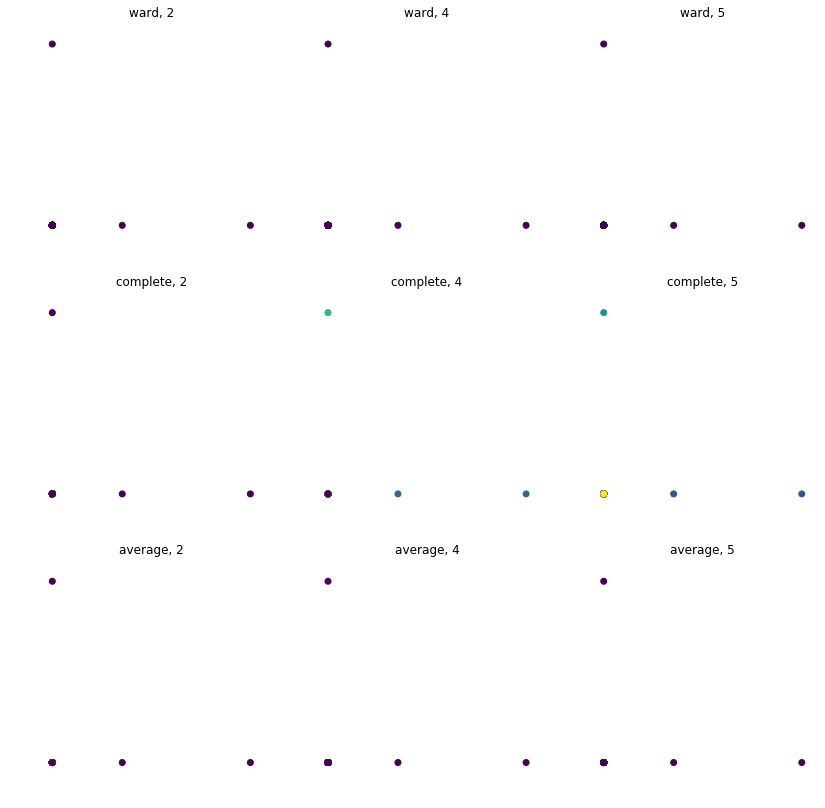

In [278]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

for (linkage, n), ax in zip(hierarchical_clustering_algorithms, axs.flatten()):
    clusterer = hierarchical_clustering_algorithms[(linkage, n)]
    clusterer.fit(all_strains_vec)
    labels = clusterer.labels_
    ax.axis('off')
    ax.scatter(all_strains_vec[:, 0], all_strains_vec[:, 1], c=labels)
    ax.set_title(f"{linkage}, {n}")

In [307]:
vec2stack = [blu_dream_vec, sour_d_vec, gdp_vec]
stacked_vec = np.concatenate((blu_dream_vec, gdp_vec))

ValueError: cannot reshape array of size 4218915 into shape (1,)

In [270]:
cluster = AgglomerativeClustering(affinity='cosine')

In [306]:
cluster.fit(stacked_vec)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.